<a href="https://colab.research.google.com/github/shreyabhandarii/Loan-Approval-Prediction/blob/Beta-model/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np

In [0]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

In [0]:
LAP=pd.read_csv('/content/gdrive/My Drive/data/LAP/train.csv')

In [114]:
LAP.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
# plt.plot(np.arange(5))

In [116]:
LAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [117]:
LAP.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:
# LAP.mode(numeric_only=True)

In [0]:
# np.mean(LAP['LoanAmount_log'])

In [0]:
# np.mean(LAP.LoanAmount_log)

In [0]:
# LAP['LoanAmount_log'].mean()

In [122]:
from scipy.stats import mode
mode(LAP)

ModeResult(mode=array([['LP002940', 'Male', 'Yes', '0', 'Graduate', 'No', 2500, 0.0,
        120.0, 360.0, 1.0, 'Semiurban', 'Y']], dtype=object), count=array([[  1, 489, 398, 345, 480, 500,   9, 273,  20, 512, 475, 233, 422]]))

1.   The distibution of 'ApplicantIncome' is right-skewed cuz mode<median<mean
2.   Most(345/614=56.2%) of the times the coapplicants income is not specified(0)
3.   The distibution of 'LoanAmount' is right-skewed cuz mode<median<mean
4.   Most of the people have taken loan for 360 days(475=77.4%)
5.   Most of the people have a credit history(84%)



In [123]:
LAP.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [0]:
LAP['Married'].fillna(mode(LAP['Married']).mode[0],inplace=True)

In [0]:
LAP['Gender'].fillna(mode(LAP['Gender']).mode[0],inplace=True)

In [0]:
LAP['Loan_Amount_Term'].fillna(LAP['Loan_Amount_Term'].median(),inplace=True)

In [0]:
LAP['Dependents'].fillna(mode(LAP['Dependents']).mode[0],inplace=True)

In [0]:
LAP['Credit_History'].fillna(mode(LAP['Credit_History']).mode[0],inplace=True)

There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables. We first try to impute loan Amount. Aim is to build a supervised learning model to predict loan amount on the basis of other variables and then use age along with other variables to predict survival. A key hypothesis is that the whether a person is educated or self-employed can combine to give a good estimate of loan amount. First, let's look at the boxplot to see if a trend exists:

In [0]:
# LAP['Dependents']


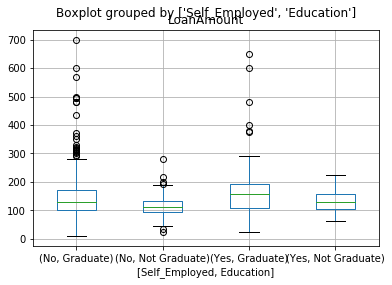

In [129]:
LAP.boxplot(column='LoanAmount', by=['Self_Employed','Education']);

Thus we see some variations in the median of loan amount for each group and this can be used to impute the 22 values. But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

In [0]:
LAP['Self_Employed'].fillna(mode(LAP['Self_Employed']).mode[0],inplace=True)

Since ~86% values are "No", it is safe to impute the 36 missing values as "No" as there is a high probability of success

In [131]:
LAP['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [132]:
table = LAP.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [0]:
# # Define function to return value of this pivot_table 
# def fage(x): 
#     return table.loc[x['Self_Employed'],x['Education']] 
# # Replace missing values
# LAP['LoanAmount'][LAP['LoanAmount'].isnull()] = LAP[LAP['LoanAmount'].isnull()].apply(fage, axis=1)

In [134]:
def fage(x):
  return table.loc[x['Self_Employed'],x['Education']]
LAP['LoanAmount'][LAP['LoanAmount'].isnull()]=LAP[LAP['LoanAmount'].isnull()].apply(fage,axis=1)#didt understand how it replaced with the tabkle vayes, lhs= sirf null values of loanamt clm, rhs m pura data frame with only rows with loan amt clm with an m fage apply kiya har row pr, usee kese replace hogya?,, basically we want ki kisi m agr no h ang grad simultaneously h to usme ye values daldo jo table mh, han to sh tp h, hum keh e h ki loanamt ki sirf nan vali values dikhao or ab vo equal h sirf ese data frme k jise noor grad h ki values h vo vali jo table , h, leking is df ka size is greater tgan the clm loan amt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# y=LAP[LAP['LoanAmount'].isnull()]
# print(y)

In [0]:
# table.loc[y['Self_Employed'],y['Education']]

In [137]:
LAP.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

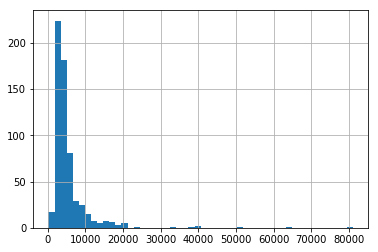

In [138]:
LAP['ApplicantIncome'].hist(bins=50);

In [0]:
# LAP.hist(bins=50)

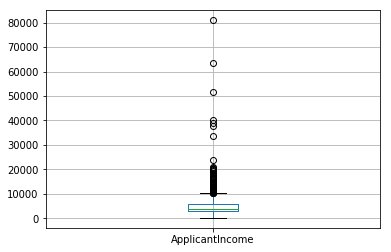

In [140]:
LAP.boxplot(column='ApplicantIncome');

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the obsevation that most of the people who take loans belong to income group of < 10000 *per month* . We should look at the data grouped by education level to get a clearer picture.

In [0]:
# LAP.boxplot(column='LoanAmount')

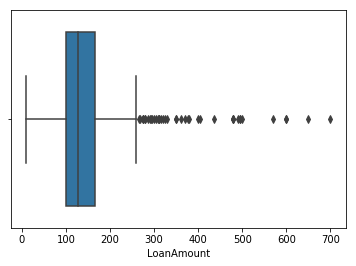

In [142]:
import seaborn as sns
sns.boxplot(LAP['LoanAmount']);#for better sundarta

There are some extreme values. Clearly, both ApplicantIncome and LoanAmount (most of them being within the range of 2.5 Lakhs) require some amount of data munging. LoanAmount had missing which we have imputed, and now we treat for  extreme values, while ApplicantIncome has a few extreme values.

In [0]:
# LAP.boxplot( )

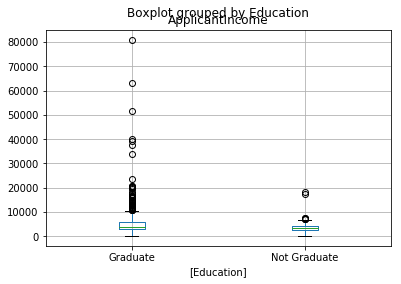

In [144]:
LAP.boxplot(column='ApplicantIncome', by = ['Education']);

In [145]:
LAP.groupby(['Education']).median()#.size()krne se freq a jati

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Education,,,,,
Graduate,4000.0,1059.0,130.0,360.0,1.0
Not Graduate,3357.5,1356.5,113.0,360.0,1.0


We can see that there is no substantial difference between the median income of graduate and non-graduates(that of graduates being substatianally higher). But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

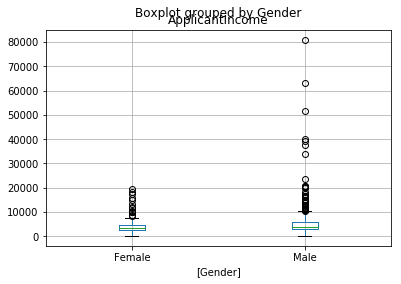

In [146]:
LAP.boxplot(column='ApplicantIncome', by = ['Gender']);

In [147]:
LAP.groupby(['Gender']).median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,3583,0.0,113.0,360.0,1.0
Male,3862,1438.5,130.0,360.0,1.0


There are a higher number of males with very high incomes, which are appearing to be the outliers. Median of male income is marginally higher than the female.

While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.

How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?
Let's analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let's try a log transformation to nullify their effect:

In [0]:
LAP['LoanAmount_log']=np.log(LAP['LoanAmount'])

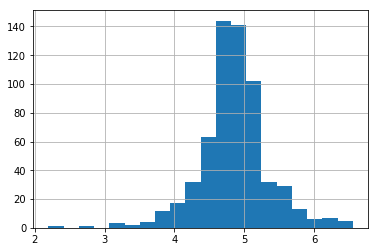

In [149]:
LAP['LoanAmount_log'].hist(bins=20);

In [0]:
# sns.distplot(LAP['LoanAmount_log'],bins=20,kde=False);

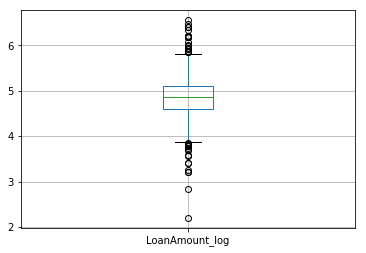

In [151]:
LAP.boxplot(column='LoanAmount_log'); #semicoln in end to avoid the text output

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

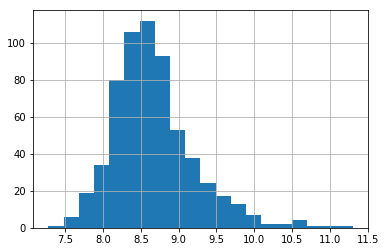

In [152]:
LAP['TotalIncome']=LAP['ApplicantIncome']+LAP['CoapplicantIncome']
LAP['TotalIncome_log']=np.log(LAP['TotalIncome'])
LAP['TotalIncome_log'].hist(bins=20);

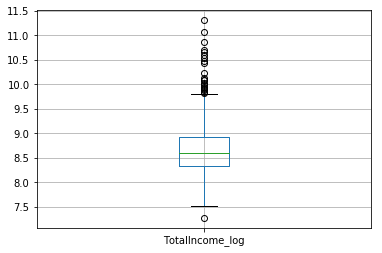

In [153]:
LAP.boxplot(column='TotalIncome_log');


Now we create a column for LoanAmount/TotalIncome might make sense as it gives an idea of how well the applicant is suited to pay back his loan.


In [0]:
LAP['CreditWorthiness']=LAP['LoanAmount']/LAP['TotalIncome']

Now we see the r/s b/w creadit history and loan status

In [0]:
temp1=LAP['Credit_History'].value_counts(ascending=True)

In [156]:
LAP.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log', 'CreditWorthiness'],
      dtype='object')

In [157]:
temp2=LAP.pivot_table(values='Loan_Status', index= 'Credit_History', aggfunc= lambda x: x.map({'Y':1,'N':0}).mean())
print(temp2)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.790476


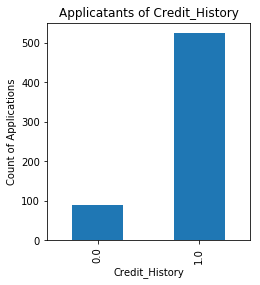

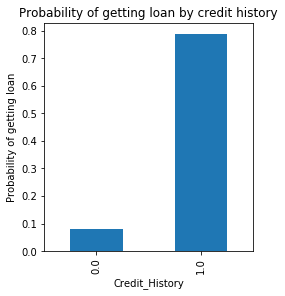

In [158]:
fig1=plt.figure(1,(8,4)).add_subplot(121)
fig1.set_xlabel('Credit_History')
fig1.set_ylabel('Count of Applications')
fig1.set_title('Applicatants by Credit_History')
temp1.plot('bar',figsize=(8,4),title='Applicatants of Credit_History')
temp2.plot(kind='bar', figsize=(3.75,4.2),title='Probability of getting loan by credit history', legend=False)
plt.xlabel('Credit_History')
plt.ylabel('Probability of getting loan');

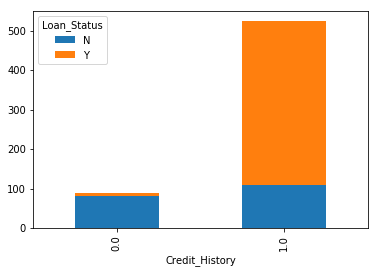

In [159]:
temp3=pd.crosstab(LAP['Credit_History'],LAP['Loan_Status'])
temp3.plot(kind='bar', stacked=True);

In [160]:
print(temp3)

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


In [161]:
LAP.pivot_table(index='Credit_History',columns='Loan_Status',values='ApplicantIncome',aggfunc=np.size) #anotherway for crosstab, values m koi bi colm nam dalo(taki ek hi colm aye rather than sare) cuz agg fn is independent of values of colmn mentioned in values

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


In [162]:
LAP.groupby(['Credit_History','Loan_Status']).size()#anotherway for crosstab, different format

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N              110
                Y              415
dtype: int64

80% loans are approved if they have credit history v/s only 8% for no credit history.

In [0]:
# fig = plt.figure(figsize=(8,4)) 
# ax1 = fig.add_subplot(121) 
# ax1.set_xlabel('Credit_History') 
# ax1.set_ylabel('Count of Applicants') 
# ax1.set_title("Applicants by Credit_History") 
# temp1.plot(kind='bar') 
# ax2 = fig.add_subplot(122)  
# ax2.set_xlabel('Credit_History') 
# ax2.set_ylabel('Probability of getting loan') 
# ax2.set_title("Probability of getting loan by credit history")
# temp2.plot(kind = 'bar');

To see if gender affects loan status

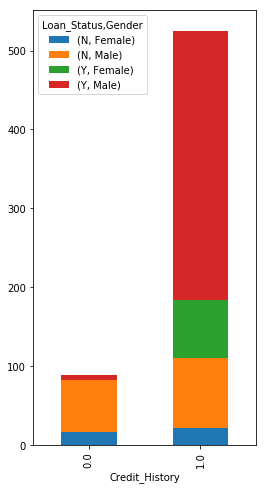

In [164]:
temp4=pd.crosstab(LAP['Credit_History'], columns=[LAP['Loan_Status'],LAP['Gender']]) 
temp4.plot(kind='bar', stacked=True, figsize=(4,8));


In [165]:
print(temp4)

Loan_Status         N           Y     
Gender         Female Male Female Male
Credit_History                        
0.0                16   66      1    6
1.0                21   89     74  341


I feel the above graph is more useful, because its more consise and is more comparable. It says that, for people with as well as without a credit history,odds of being approved and rejected for male is more. (untrue, see below graph)(ie cuz, male are more in number). Among people without a credit history, odds are in favor of being rejected as a female vs being accepted, and odds are in favor of rejected as a male.(ie cuz ppl without credit history are more rejected than accepted) Among people with a credit history, odds are in favor of being accepted as a female vs being rejected, and odds are in favor of accepted as a male.(if we wat to see that if female in gen are rej more or not to upar wali ka comparison niche wale grph se kro, or 2nd comparirison is useless uskelie bina gender wale graph se kro)  therefore the below graph is better. this one can give wrong conclusions

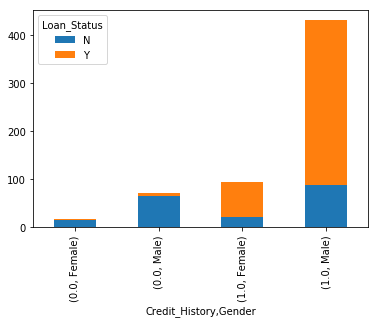

In [166]:
temp5=pd.crosstab([LAP['Credit_History'],LAP['Gender']], columns=LAP['Loan_Status']) 
temp5.plot(kind='bar', stacked=True);

In [0]:
# l=LAP.copy()

In [0]:
# LAP.drop_duplicates(subset=['Credit_History'])#doesnt change the original df but returns a copy

In [0]:
# from random import sample 
# index=sample(range(len(LAP)),5)#gives a different sample everytime this code is run
# sample=LAP.ix[index]
# print(sample)

In [0]:
def check_nan(df):
  for col in df.columns:
    if df[col].isnull().values.any():
      print("%s has missing %d missing values"%(col,df[col].isnull().values.sum() ))

In [0]:
check_nan(LAP)

In [172]:
len(LAP)

614

In [173]:
LAP.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,CreditWorthiness
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534,5849.0,8.674026,0.022226
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,0.023500


In [174]:
print(LAP.shape)

(614, 17)


# Preparing the data for launch

In [0]:
#Getting rid of unuseful columns
temp = LAP.drop(['Loan_ID'], axis=1) # Loan ID is not a feature hat affects Loan Approval. Only useful during submission.

In [176]:
# Rearranging the columns making the labels as the last column
# Caution : One time Run, otherwise it may mess up the 
col =list(temp.columns.values)
col = col[:11] + col[12:] +col[11:12]
df= temp[col]
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,CreditWorthiness,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,4.867534,5849.0,8.674026,0.022226,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030,6091.0,8.714568,0.021015,N


In [177]:
df.Dependents.value_counts()
# dependents has a value '3+' which is not a number

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
# Converting the Dependents data into numerical data
df['Dependents'] = df.Dependents.map(lambda p: 3 if p=='3+' else p)

In [179]:
# Conerting the data into their correct datatypees
df['Dependents'] = df['Dependents'].astype('int')
df['Married'] = df['Married'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')

df.dtypes

Gender               category
Married              category
Dependents              int64
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
LoanAmount_log        float64
TotalIncome           float64
TotalIncome_log       float64
CreditWorthiness      float64
Loan_Status            object
dtype: object

In [180]:
df.Dependents.value_counts() 
# data is now numerical

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [181]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,CreditWorthiness,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,4.867534,5849.0,8.674026,0.022226,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030,6091.0,8.714568,0.021015,N


In [0]:
# Converting data into numpy array
X_temp= df.iloc[:,:-1].values# array of features

Y_temp= df.iloc[:, -1].values# aray of labels

In [0]:
col=df.columns

In [0]:
col=df.columns
idx = [col.get_loc("Gender"), col.get_loc("Married"), col.get_loc("Education"),col.get_loc("Self_Employed") ,col.get_loc("Property_Area")]

In [185]:
idx

[0, 1, 3, 4, 10]

In [0]:
X=X_temp[:][:]
Y=Y_temp[:]

In [0]:
# label Encoding the categorical features
from sklearn.preprocessing import LabelEncoder
lbe_X= LabelEncoder() 
X[:,0]= lbe_X.fit_transform(X_temp[:,0])
X[:,1]= lbe_X.fit_transform(X_temp[:,1])
X[:,3]= lbe_X.fit_transform(X_temp[:,3])
X[:,4]= lbe_X.fit_transform(X_temp[:,4])
X[:,10]= lbe_X.fit_transform(X_temp[:,10])

In [0]:
# Encoding the labels
lbe_y=LabelEncoder()
Y= lbe_y.fit_transform(Y_temp)

In [244]:
# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=0)
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(552, 15) (62, 15) (552,) (62,)


In [0]:
#StandardScaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [0]:
import torch
import torch.nn as nn
import torch.optim  as optim

In [0]:
# Converting Numpy arrays to Pytorch Tensors after applying scaling

X_train,X_val,Y_train,Y_val = map(torch.tensor,(X_train,X_val,Y_train,Y_val))

In [0]:
class FFNetwork(nn.Module):
    def __init__(self, x):
        super().__init__()
        torch.manual_seed(0)
        self.net= nn.Sequential(nn.Linear(x.shape[1],1),nn.Sigmoid())
        
    def forward(self,X):
        return self.net(X)

In [0]:
from sklearn.metrics import accuracy_score
def accuracy(y_hat, y):
  pred= torch.Tensor([1 if hat>= 0.5 else 0 for hat in y_hat])
  pred= pred.view(-1,1).float()
  return accuracy_score(pred, y)

# Creating the model

In [0]:
def fit(x, y, model, loss_function, l_r, epochs=1000, mini_batch_size = 64):
    loss_arr=[]
    loss_per_epoch=[]
    acc_arr=[]
    test_acc_arr=[]
    opt=optim.SGD(fn.parameters(),lr= l_r)
    m = x.shape[0]
    for epochs in range(epochs):
        for k in range(0, m, mini_batch_size):
            x_mini , y_mini = x[k:k+mini_batch_size], y[k:k+mini_batch_size]
            y_hat=fn(x_mini.float())
            # print(y_hat.shape, y_mini.shape)
            loss=loss_function(y_hat, y_mini.view(-1,1).float())
            loss_arr.append(loss.item())
            
            loss.backward()
            opt.step()
            opt.zero_grad()
        loss_per_epoch.append(loss.item())
        acc_arr.append(accuracy(y_hat, y_mini.view(-1,1).float()))
        test_acc_arr.append(accuracy(fn(X_val.float()), Y_val.view(-1,1).float()))
    plt.plot(loss_per_epoch, 'r')
    plt.plot(acc_arr,'b')
    plt.plot(test_acc_arr, 'g')
    plt.show()
    print('Loss before training', loss_arr[0])
    print('Loss after training', loss_arr[-1])
    print('Accuracy', acc_arr[-1])

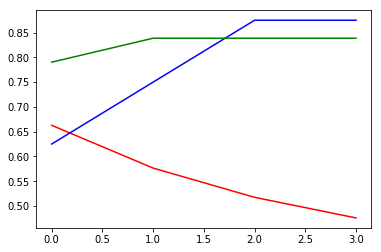

Loss before training 0.6945523023605347
Loss after training 0.4758136570453644
Accuracy 0.875
Test accuracy: 0.8387096774193549


In [259]:
fn = FFNetwork(X_train)
# fn.to(device)
#Training on training data
loss_fn=nn.BCELoss()
fit(X_train, Y_train, fn, loss_function= loss_fn, l_r= 0.05, epochs=4, mini_batch_size = 32)
print("Test accuracy:",accuracy(fn(X_val.float()), Y_val.float()))

In [0]:
import matplotlib.pyplot as plt

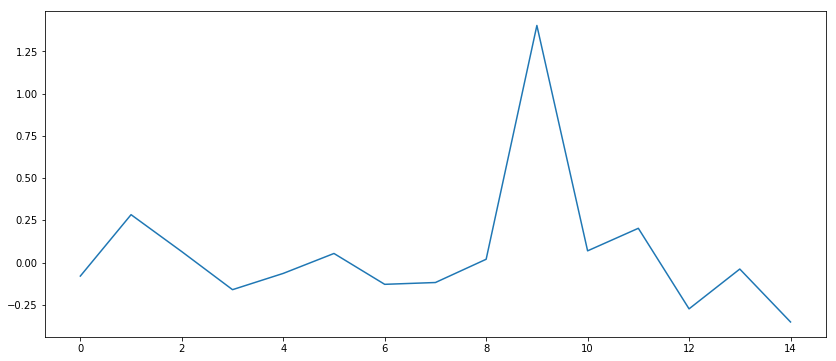

In [254]:
w1=np.array(fn.net[0].weight[0].data.clone().detach())
plt.figure(figsize=(14,6))
plt.plot(w1)

In [224]:
df.shape

(614, 16)

In [225]:
X_train.shape

torch.Size([460, 15])